### Prerequisite for Balancing Technique

In [1]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
    1.1 Load required libraries
    </span></div>

In [3]:
# Numerical libraries
import numpy as np

# To handle data in form of rows and columns
import pandas as pd

# Importing Ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing seaborn for statistical plots
import seaborn as sns

#Preprocessing
#Import Library related to LabelEncoder
from sklearn.preprocessing import LabelEncoder

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Import KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,recall_score

#Balancing Technique
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# To suppress un-necessary warnings
import warnings

warnings.filterwarnings("ignore")


In [4]:
outliers = []


def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(i)
    return outliers  # Driver code


# sample_outliers = detect_outliers_zscore(df_Bank.MonthlyAverageSpend)
# print("Outliers from Z-scores method: ", sample_outliers)

In [5]:
def detect_outliers_iqr(data):
    outliers=[]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">PART ONE | TOTAL | 30 </span></div>

## Context:
Medical research university X is undergoing a deep research on patients with certain conditions. University
has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the
client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

## Data Description:
The data consists of biomechanics features of the patients according to their current conditions. Each patient
is represented in the data set by six biomechanics attributes derived from the shape and orientation of the
condition to their body part.

1. P_incidence

2. P_tilt

3. L_angle

4. S_slope

5. P_radius

6. S_degree

7. Class

## Project Objective:
Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training
Supervised Learning algorithms.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">Steps and Tasks:</span>


<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
    1. Data Understanding: 5</span></div>


### a. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

In [6]:
# Creating the dataframe and import dataset
df_Normal = pd.read_csv("Normal.csv")
df_Type_H = pd.read_csv("Type_H.csv")
df_Type_S = pd.read_csv("Type_S.csv")

In [7]:
# Check top 5  records Normal Data Set
df_Normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [8]:
# Check top 5  records Type_H Data Set
df_Type_H.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [9]:
# Check top 5  records Type_S Data Set
df_Type_S.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


### b. Print Shape and columns of all the 3 DataFrames. [1 Mark]

In [10]:
print(
    "DataFrames",
    "\tRows",
    "\tColumns" "\n\nNormal\t\t",
    df_Normal.shape[0],
    "\t",
    df_Normal.shape[1],
    "\n\nType_H\t\t",
    df_Type_H.shape[0],
    "\t",
    df_Type_H.shape[1],
    "\n\nType_S\t\t",
    df_Type_S.shape[0],
    "\t",
    df_Type_S.shape[1],
)

DataFrames 	Rows 	Columns

Normal		 100 	 7 

Type_H		 60 	 7 

Type_S		 150 	 7


In [11]:
# Columns
print(
    "df_Normal Columns :",
    df_Normal.columns,
    "df_Type_H Columns :",
    df_Type_H.columns,
    "df_Type_S Columns :",
    df_Type_S.columns,
)

df_Normal Columns : Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') df_Type_H Columns : Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') df_Type_S Columns : Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### c. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue;">**Columns in 3 DataFrames "Normal,"Type_H","Type_S" are same and also datatype are same ,hence all the thee dataframes can be combined into one data set / dataframe to perform Analysis**</span

### d. Print DataTypes of all the 3 DataFrames. [1 Mark]

In [12]:
# Normal Datatype
df_Normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [13]:
# Type_H Datatype
df_Type_H.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [14]:
# Type_S Datatype
df_Type_S.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

### e. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

In [15]:
df_Normal.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue;">
-- For Dataframe "df_Normal" the Class column consist 2 unique values 
    
1. "Normal" with count 73 
2. "Nrmal"   with count 27

-- Observed: "Nrmal" is spelled incorrect , hence to be update with "Normal"
</span>

In [16]:
df_Type_H.Class.value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue;">
-- For Dataframe "df_Type_H" the Class column consist 2 unique values

1. "Type_H" with count 37 
2. "type_h"   with count 23

-- Observed: As per case sensitve issue ,  "type_h" to be update with "Type_H" as both has same meaning
</span>

In [17]:
df_Type_S.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue;">
    -- For Dataframe "df_Type_S" the Class column consist 2 unique values

1. "Type_S" with count 133 
2. "tp_s"   with count 17

-- Observed: "tp_s" is spelled incorrect , hence to be update with "Type_S"
    </span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2. Data Preparation and Exploration: 5
    </span></div>

### a. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

### For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

In [18]:
# DataFrame Normal

# Update value of column Class "Nrmal" to  "Normal"
df_Normal.Class.loc[df_Normal["Class"] == "Nrmal"] = "Normal"

# Check Unique values
df_Normal.Class.value_counts()

Normal    100
Name: Class, dtype: int64

In [19]:
#DataFrame Type_H

# Update value of column Class "type_h" to  "Type_H"
df_Type_H.Class.loc[df_Type_H['Class'] == 'type_h'] = "Type_H"

#Check Unique values
df_Type_H.Class.value_counts()


Type_H    60
Name: Class, dtype: int64

In [20]:
# DataFrame Type_S

# Update value of column Class "tp_s" to  "Type_S"
df_Type_S.Class.loc[df_Type_S["Class"] == "tp_s"] = "Type_S"

# Check Unique values
df_Type_S.Class.value_counts()

Type_S    150
Name: Class, dtype: int64

### b. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
### Checkpoint: Expected Output shape = (310,7)

In [21]:
# Concat 3 dataframes
df_biomechanics = pd.concat([df_Normal, df_Type_H, df_Type_S])

# Shape of new DataFrame
df_biomechanics.shape

(310, 7)

### c. Print 5 random samples of this DataFrame [1 Marks]

In [22]:
# Random Sample
df_biomechanics.sample(n=5, random_state=None)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
74,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,Type_S
12,84.974132,33.021175,60.859873,51.952957,125.659534,74.333409,Type_S
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
94,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
76,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,Type_S


### d. Print Feature-wise percentage of Null values. [1 Mark]

In [23]:
# Check for null values
# Feature-wise percentage of Null values.
df_biomechanics.isnull().sum() * 100 / len(df_biomechanics)


P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue;">
    There are no missing values in the data.
    </span>

## e. Check 5-point summary of the new DataFrame. [1 Mark]

In [24]:
df_biomechanics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue;">
The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.

Mean and Median of "P_incidence","P_tilt","L_angle","S_slope","P_radius" column is nearly equal,So there no skewness

Mean is greater than Median in "S_Degree".Data is skewed to the right

High fluctuation in "S_Degree" column. 50% of data has zero values but maximum value is 418. This is hugely affected by outliers
</span>

###  Check the distribution of 'Class' variable

Text(0.5, 1.0, 'Count of all Classes')

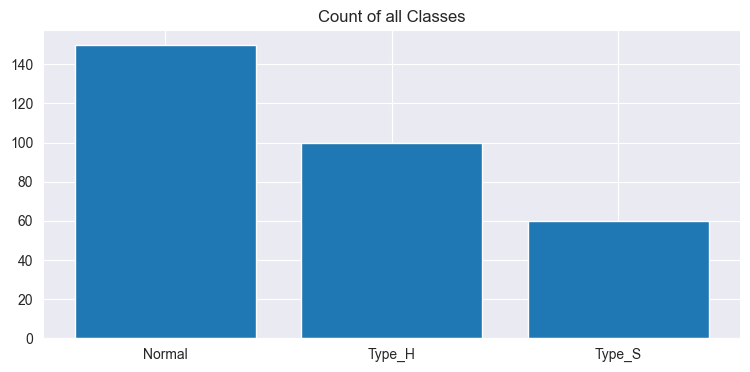

In [27]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(9, 4))
plt.bar(
    x=df_biomechanics["Class"].unique(), height=df_biomechanics["Class"].value_counts()
)
plt.title("Count of all Classes")

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Data Analysis: 10
</span></div>

### a. Visualize a heatmap to understand correlation between all features [2 Marks]

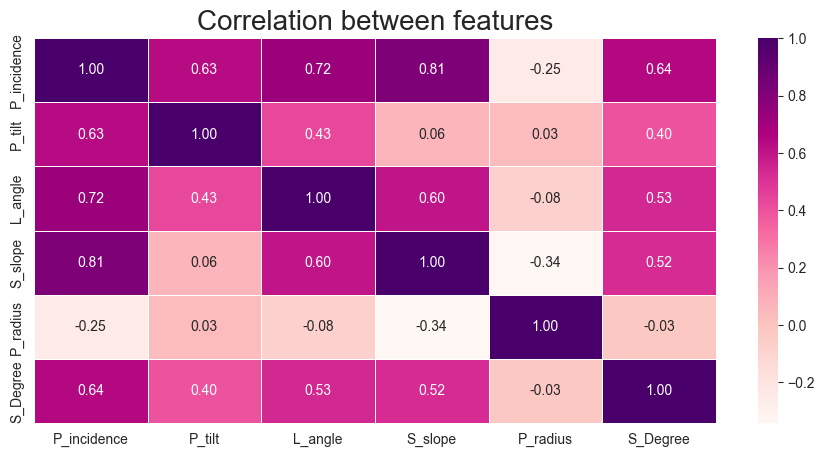

In [28]:
# correlation map
f, ax = plt.subplots(figsize=(11, 5))
sns.heatmap(
    df_biomechanics.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax=ax
)
plt.title("Correlation between features", fontsize=20)
plt.show()

### b. Share insights on correlation. [2 Marks]


In [29]:
# Display positive and negative correlation between columns
df_biomechanics.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

All the features are slightly correlated with label, excepting P_radius
    
There is high positive relation between P_incidence with P_tilt,L_angle,S_Slope and S_Degree
    
There is negative relation between P_incidence and P_radius
    
There is high negative relation between P_radius and S_slope ,L_angle, S_Degree
   
</span>

In [30]:
# sorts all correlations with ascending sort.
df_biomechanics.corr().unstack().sort_values().drop_duplicates()

P_radius     S_slope       -0.342128
P_incidence  P_radius      -0.247467
P_radius     L_angle       -0.080344
             S_Degree      -0.026065
P_tilt       P_radius       0.032668
             S_slope        0.062345
             S_Degree       0.397862
L_angle      P_tilt         0.432764
S_slope      S_Degree       0.523557
L_angle      S_Degree       0.533667
             S_slope        0.598387
P_tilt       P_incidence    0.629199
S_Degree     P_incidence    0.638743
L_angle      P_incidence    0.717282
P_incidence  S_slope        0.814960
             P_incidence    1.000000
dtype: float64

### i. Features having stronger correlation with correlation value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
Here we can infer that “S_slope” have strong positive correlation with “P_incidence” with correlation value = 0.814960
</span>

### ii. Features having weaker correlation with correlation value.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
Here we can infer that “S_slope” have weaker correlation with “P_radius” with correlation value = -0.342128
</span>

### c. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

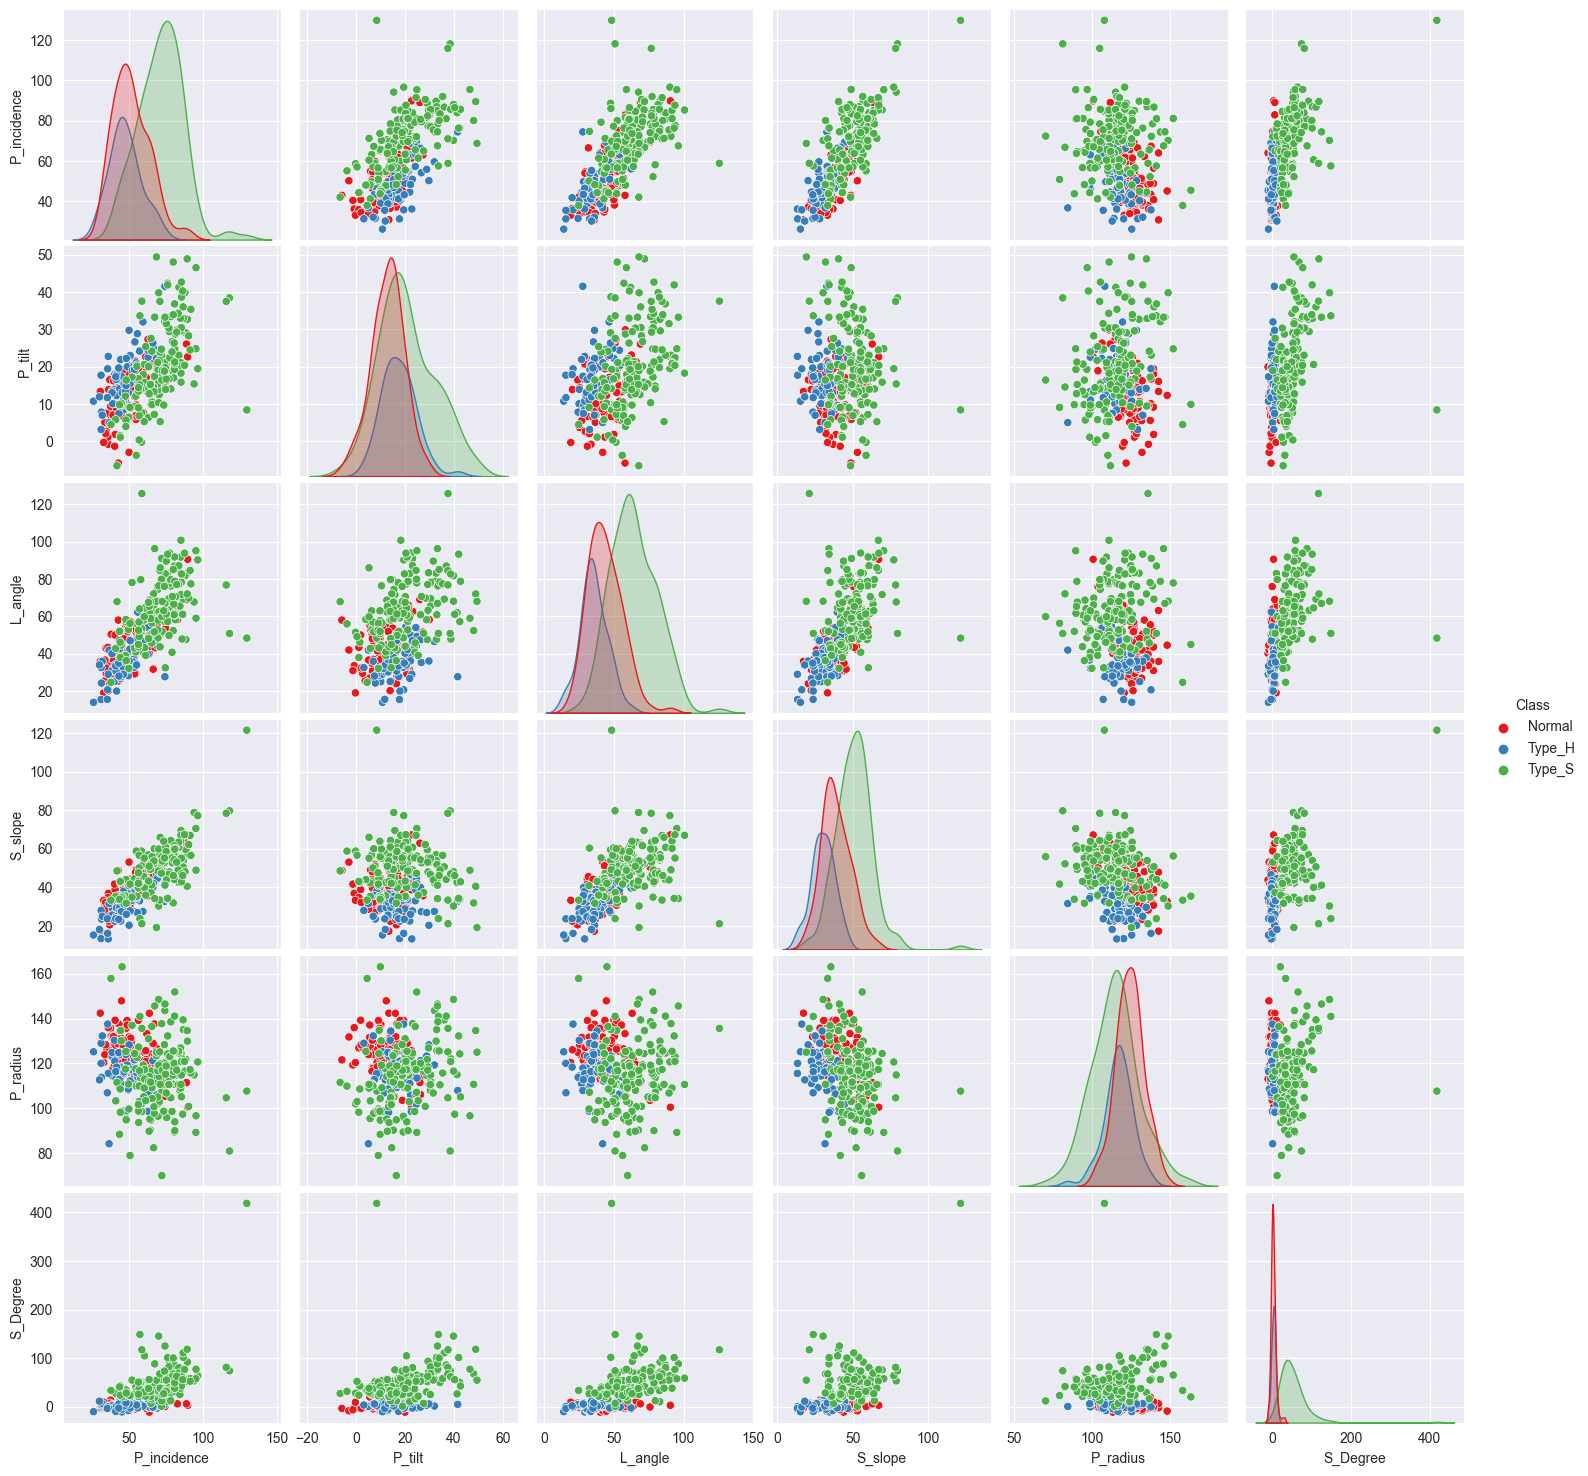

In [31]:
sns.pairplot(data=df_biomechanics, hue="Class", palette="Set1")

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

By getting a high level overview of plots from pair plot, 
From the above plot we can conclude :

Higher the P_incidence it leads to Type_S class
    
Data is separable for Normal and Type_H and Type_S

The data distribution across various dimensions except 'S_Degree' do look normal

There are outliers in the data 
</span>

### d. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

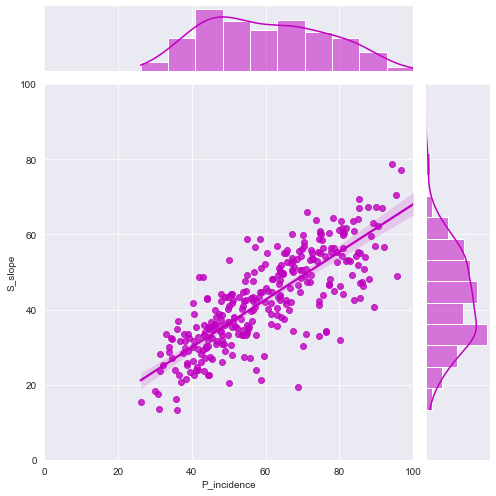

In [29]:
g = sns.jointplot(
    x="P_incidence",
    y="S_slope",
    data=df_biomechanics,
    kind="reg",
    xlim=(0, 100),
    ylim=(0, 100),
    color="m",
    height=7,
)

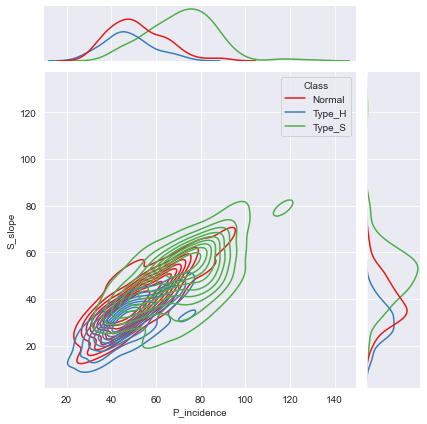

In [30]:

sns.jointplot(
    data=df_biomechanics,
    x="P_incidence",
    y="S_slope",
    hue="Class",
    kind="kde",
    palette="Set1"
)


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

We can easily say: As P_incidence increases , corresponding S_Slope automatically increases

Higher P_incidence and S_Slope leads to Type_S class
    
P_incidence and S_Slope is considered to have a normal range of values between 15 and 85 degrees.

Data for Type_s is scattered till range 120 which is outlier
    
</span>

### e. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

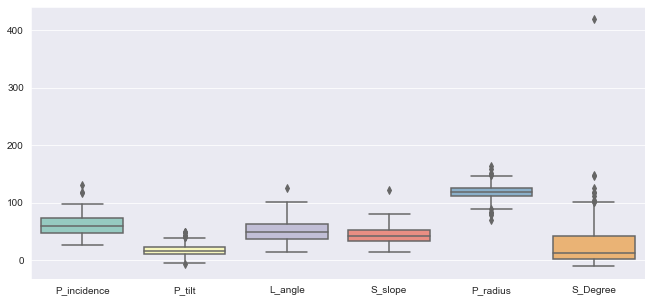

In [31]:
f, ax = plt.subplots(figsize=(11, 5))
sns.boxplot(data=df_biomechanics, palette="Set3")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
Outliers exists for each column
    
Also there are more number of outliers for S_Degree 

</span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Imputing Outliers in Data</span></div>

In [32]:
col = ["P_incidence", "P_tilt", "L_angle", "S_slope", "P_radius", "S_Degree"]
TotalOutliers = 0

for i in col:
        sample_outliers = []
        sample_outliers = detect_outliers_iqr(df_biomechanics[i])
        print("\n\nTotal Number of outliers in ", i, "is :", len(sample_outliers))

        TotalOutliers = TotalOutliers + len(sample_outliers)
        #print(df_biomechanics[i])
        median= df_biomechanics[i].median()

        if len(sample_outliers) > 0:
            print("\nOutliers : ", sample_outliers)
            print(
                "\nClass for respective Outliers:\n",
                df_biomechanics.Class[df_biomechanics[i].isin(sample_outliers)]
            )
            df_biomechanics[i].loc[df_biomechanics[i].isin(sample_outliers)] = median
          
           # df_biomechanics.drop(df_biomechanics[df_biomechanics[i].isin(sample_outliers)].index, inplace = True)
        else:
             print("\nThere are no Outliers")




Total Number of outliers in  P_incidence is : 3

Outliers :  [115.9232606, 118.1446548, 129.8340406]

Class for respective Outliers:
 55     Type_S
102    Type_S
103    Type_S
Name: Class, dtype: object


Total Number of outliers in  P_tilt is : 13

Outliers :  [-6.554948347, 39.82272448, 39.84466878, 40.30376567, 41.28630543, 41.55733141, 41.93368293, 42.39620445, 42.68919513, 46.55005318, 48.06953097, 48.90365265, 49.4318636]

Class for respective Outliers:
 51     Type_H
5      Type_S
15     Type_S
24     Type_S
52     Type_S
62     Type_S
76     Type_S
81     Type_S
85     Type_S
119    Type_S
131    Type_S
142    Type_S
146    Type_S
Name: Class, dtype: object


Total Number of outliers in  L_angle is : 1

Outliers :  [125.7423855]

Class for respective Outliers:
 137    Type_S
Name: Class, dtype: object


Total Number of outliers in  S_slope is : 1

Outliers :  [121.4295656]

Class for respective Outliers:
 55    Type_S
Name: Class, dtype: object


Total Number of outliers in  

In [33]:
print("\nTotal no Outliers in all columns:", TotalOutliers)
print(
    "\nTotal count for Type_S:",
    df_biomechanics.Class[df_biomechanics.Class == "Type_S"].count(),
)
print("\nTotal Data", df_biomechanics.shape[0])


Total no Outliers in all columns: 39

Total count for Type_S: 150

Total Data 310


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
Decisions For outliers:
    
As per above we observe that there are total 39 outliers which belongs to Type_S class .

Total records belongs to Type_S is 150
    
Total sample data is 310 which is very less and deleting outliers which is around 25% of Class Type_S will affect the resultant model as it is significant data that represents class Type_S
    
Hence we are not deleting outliers ,replacing with median
    
</span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Convert categorical variable "Class" into numerical variables.
    </span></div>

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">2. Data Preparation: [2 Marks]</span>

### A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [34]:
# Convert categorical variable "Class" into numerical variables.

# Create an instance of LabelEncoder class
labelEncoder = LabelEncoder()

# Apply fit and transform and store converted values
# Assigning numerical values and storing it in another column called "State_N"
df_biomechanics["Class"] = labelEncoder.fit_transform(df_biomechanics["Class"])

# df_biomechanics["Class"]=df_biomechanics["Class"].replace({'Normal':1,'Type_H':0,'Type_S':0})
# Display the dataframe
df_biomechanics.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
35,57.522356,33.647075,50.909858,23.875281,140.981712,11.767934,2
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
55,58.691038,8.404475,48.384057,42.404912,107.690466,11.767934,2
5,83.933009,16.357689,62.000000,42.646703,115.012334,26.588100,2
18,38.046551,8.301669,26.236830,29.744881,123.803413,3.885773,0


In [35]:
# Let us look at the target column which is 'Class' to understand how the data is distributed amongst the various values
df_biomechanics.groupby(["Class"]).mean()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
0,51.685244,12.821414,43.542605,38.863830,123.594570,2.186572
1,47.638407,16.978801,35.463524,30.239612,117.042081,2.480251
2,70.262031,18.892142,63.602242,50.239355,114.799687,42.734647


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">Class 2 i.e Type_S varies largely in S_Degree column in compare to other 2 Classes</span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 4. Model Building: 6</span></div>

### a. Split data into X and Y. [1 Marks]

In [36]:
## Define X and Y variables
X = df_biomechanics.drop("Class", axis=1)
y = df_biomechanics[["Class"]]

In [37]:
from sklearn.preprocessing import StandardScaler as sc

scc = sc()
X = scc.fit_transform(X)

### b. Split data into train and test with 80:20 proportion. [1 Marks]

In [38]:
##Split into training 80 and test 20 set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=7
)

### c. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

In [39]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred= knn.predict(X_test)

# evaluate accuracy
print("With KNN (K=3) accuracy is: ",accuracy_score(y_test, y_pred))



With KNN (K=3) accuracy is:  0.7903225806451613


### Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Misclassification error

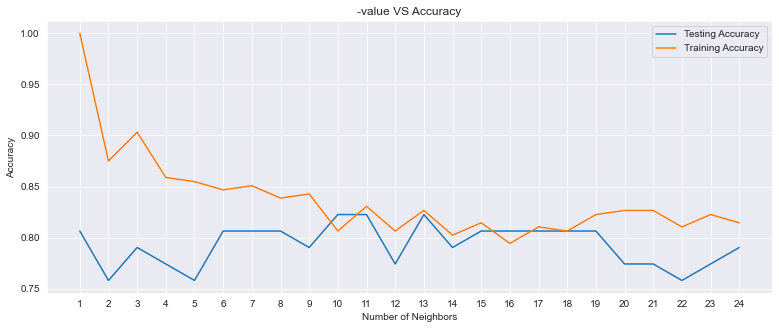

In [40]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13, 5])
plt.plot(neig, test_accuracy, label="Testing Accuracy")
plt.plot(neig, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("-value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neig)
plt.savefig("graph.png")
plt.show()




In [41]:
print(
    "Best test accuracy is {} with K = {}.".format(
        np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))
    )
)
print(
    "\nThe corresponding train accuracy is {}.".format(
        train_accuracy[test_accuracy.index(np.max(test_accuracy))]
    )
)

Best test accuracy is 0.8225806451612904 with K = 10.

The corresponding train accuracy is 0.8064516129032258.


In [42]:
# instantiate learning model (k = 10)
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
# evaluate accuracy
print(
    "With KNN (K=10) accuracy is: ", round(accuracy_score(y_test, y_pred) * 100, 2), "%"
)

With KNN (K=10) accuracy is:  82.26 %


### d. Print all the possible classification metrics for both train and test data. [2 Marks]

### Classification report for Training Set

In [43]:
# training Set
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        79
           1       0.72      0.50      0.59        46
           2       0.96      0.89      0.92       123

    accuracy                           0.81       248
   macro avg       0.78      0.75      0.75       248
weighted avg       0.82      0.81      0.80       248



### Classification report for Test Set

In [44]:
# Test Set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.82      0.64      0.72        14
           2       0.89      0.93      0.91        27

    accuracy                           0.82        62
   macro avg       0.82      0.79      0.80        62
weighted avg       0.82      0.82      0.82        62



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">From the classification report, it can be seen that the model has an average weighted performance of around 82% ranging from precision, recall, f1-score, and support. </span>

<AxesSubplot:>

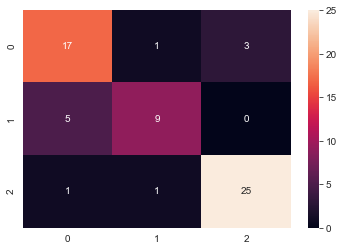

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Performance Improvement: 4

### a. Tune the parameters/hyperparameters to improve the performance of the base model. [2 Marks]

In [ ]:
# Create new KNN object
knn_2 = KNeighborsClassifier()
param_grid = {
    "n_neighbors": list(range(1, 30)),
    "leaf_size": list(range(1, 50)),
    "p": (1, 2),
    "weights": ["distance"],
    "algorithm": ["auto"],
    "metric": ["minkowski"],
}
# Use GridSearch
grid = GridSearchCV(
    knn_2, cv=10, param_grid=param_grid, verbose=1, n_jobs=-1, scoring="accuracy"
)
# Fit the model
best_model = grid.fit(X_train, y_train)
# Print The value of best Hyperparameters
print("Best leaf_size:", best_model.best_estimator_.get_params()["leaf_size"])
print("Best p:", best_model.best_estimator_.get_params()["p"])
print("Best n_neighbors:", best_model.best_estimator_.get_params()["n_neighbors"])

Fitting 10 folds for each of 2842 candidates, totalling 28420 fits


In [106]:
#Parameter setting that gave the best results on the hold out data.
print('Best Params - KNN:',best_model.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - KNN:', best_model.best_score_ )


Best Params - KNN: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

Best Score - KNN: 0.8066666666666666


<IPython.core.display.Javascript object>

### b. Clearly showcase improvement in performance achieved. [1 Marks]
For Example:
i. Accuracy: +15% improvement
ii. Precision: +10% improvement.

### Classification report for Training Set

In [100]:
ypredtrain = best_model.predict(X_train)

<IPython.core.display.Javascript object>

In [101]:
# Training Set
print(classification_report(y_train, ypredtrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00       123

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



<IPython.core.display.Javascript object>

### Classification report for Test Set

In [102]:
ypred = best_model.predict(X_test)

<IPython.core.display.Javascript object>

In [103]:
# Test Set
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.69      0.64      0.67        14
           2       0.89      0.93      0.91        27

    accuracy                           0.79        62
   macro avg       0.77      0.76      0.76        62
weighted avg       0.79      0.79      0.79        62



<IPython.core.display.Javascript object>

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
After Tuning ,From the classification report, it can be seen that the model has an average weighted performance has increased by 2% of around 84% ranging from precision, recall, f1-score, and support. </span>

In [ ]:
sns.heatmap(confusion_matrix(y_test, ypred), annot=True)

In [ ]:
print("Accuracy of model: ", accuracy_score(y_test, ypred))

### c. Clearly state which parameters contributed most to improve model performance.
What could be the probable reason? [1 Marks]

In [ ]:
#Parameter setting that gave the best results on the hold out data.
print('Best Params - KNN:',best_model.best_params_ ) 

print("Best p:", best_model.best_estimator_.get_params()["p"])

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
The distance metric used for the tree was Minkowski

The umber of neighbors used for k neighbor queries was 10 

The power parameter for the Minkowski metric was 2 (When p = 2, this is equivalent to using Euceledian Distance )

All points in each neighborhood were weighted equally

The first model was our default model without any tuning.  Indeed, tuning parameters can get us significant gains over the accuracy of our default model. 
</span>


<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">PART TWO | TOTAL | 30 </span></div>

Context:
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base
whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is
interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign
that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being
the core strength of the business strategy, marketing department wants to devise effective campaigns with
better target marketing to increase the conversion ratio to double digit with same budget as per last
campaign.
Data Description:
The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.
Project Objective:
Build a Machine Learning model to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

Project Objective:
Build a Machine Learning model to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Steps and Tasks:
    </span></div>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Data Understanding and Preparation: 5</span></div>

### a. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Mark]

In [46]:
# Creating DataFrame
df_Data1 = pd.read_csv("Data1.csv")
df_Data2 = pd.read_csv("Data2.csv")

In [47]:
df_Data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [48]:
df_Data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


### b. Print shape and Column Names and DataTypes of both the Dataframes. [1 Mark]

In [49]:
print(
    "DataFrames",
    "\tRows",
    "\tColumns" "\nData1\t\t",
    df_Data1.shape[0],
    "\t",
    df_Data1.shape[1],
    "\n\nData2\t\t",
    df_Data2.shape[0],
    "\t",
    df_Data2.shape[1],
)

DataFrames 	Rows 	Columns
Data1		 5000 	 8 

Data2		 5000 	 7


In [50]:
# Columns
df_Data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [51]:
df_Data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

### c. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

In [52]:
df_Bank = pd.merge(df_Data1, df_Data2, how="inner", on="ID")
df_Bank.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [53]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


### d. Change Datatype of below features to ‘Object’ [1 Mark]
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But
DataType is ‘int’/’float’ which is not expected.]
Proprietary

In [54]:
col = [
    "HiddenScore",
    "Level",
    "Security",
    "FixedDepositAccount",
    "InternetBanking",
    "CreditCard",
]
for i in col:
    df_Bank[i] = df_Bank[i].astype("object")
df_Bank.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2. Data Exploration and Analysis: 5
    </span></div>

### a. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

In [55]:
df_Bank["LoanOnCard"].value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

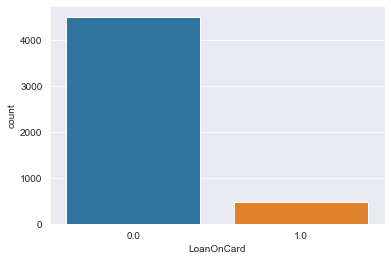

In [56]:
sns.countplot(df_Bank["LoanOnCard"])

### b. Check the percentage of missing values and impute if required. [1 Mark]

In [57]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 715.0+ KB


In [58]:
# Check for null values
# Feature-wise percentage of Null values.
round(df_Bank.isnull().sum() * 100 / len(df_Bank),2)


ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">**Observed that Target variable Loanoncard having few missing records.
LoanOnCard  column consist 0.4% of null  values, which need to be imputed.**
    </span>

In [59]:
df_Bank.LoanOnCard.isnull().sum()

20

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">**There are only 20  missing value of 5000 records which is very less 
so we will replace the missing records with median value of column LoanOnCard**</span>

In [60]:
# every column's missing value is replaced with median respectively

df_Bank.LoanOnCard = df_Bank.LoanOnCard.fillna((df_Bank.LoanOnCard.median()))
df_Bank.head()
# df_Bank.dropna(axis=0,inplace=True)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [61]:
df_Bank.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">All the missing records are imputed with median

</span>

### c. Check for unexpected values in each categorical variable and impute with best suitable value.
[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected
values which needs treatment ] [2 Marks]

In [62]:
for col in df_Bank.select_dtypes(include=["object"]):
    print(col, df_Bank[col].unique())

HiddenScore [4 3 1 2]
Level [1 2 3]
Security [1 0]
FixedDepositAccount [0 1]
InternetBanking [0 1]
CreditCard [0 1]


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
--There are 6 columns with object datatype 

--There are no unexpected values

--All the values in these features are valid 
    
</span>

In [63]:
df_Bank.LoanOnCard.value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3. Data Analysis & Visulaization
    </span></div>

### 5 Point Summary

In [64]:
df_Bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
LoanOnCard,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">


The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.

Mean and Median of "Age","CustomerSince" column is nearly equal,So there no skewness

Mean is greater than Median in "HighestSpend" and "MonthlyAverageSpend".Data is skewed to the right

We can see high fluctuation in "Mortgage" column. 50% of data has zero values but maximum value is 635. This is hugely affected by outliers
</span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Pre-processing</span></div>
Imputing Outlier Analysis



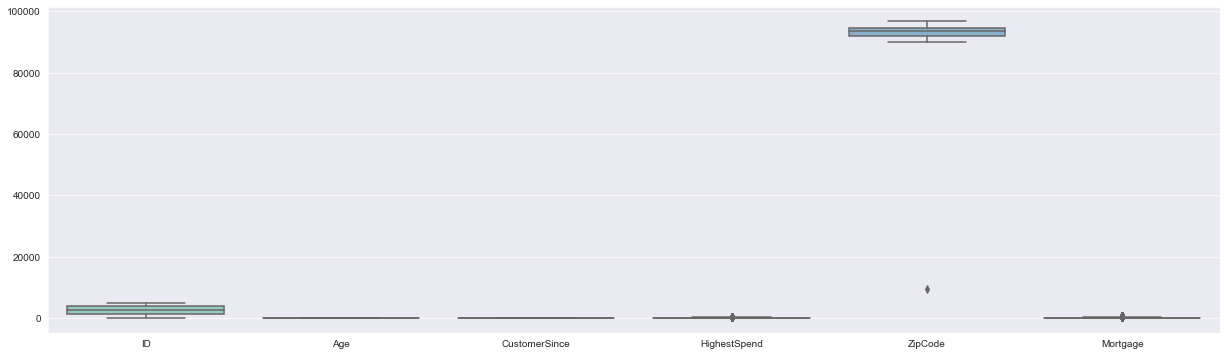

In [65]:
#Box plot for numeric variables
f, ax = plt.subplots(figsize=(21, 6))
sns.boxplot(data=df_Bank.select_dtypes(include=["int64"]), palette="Set3")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
Extreme Outliers exists for Zipcode column
    
ID and Zipcode column to be droped as it is of no use in model

</span>

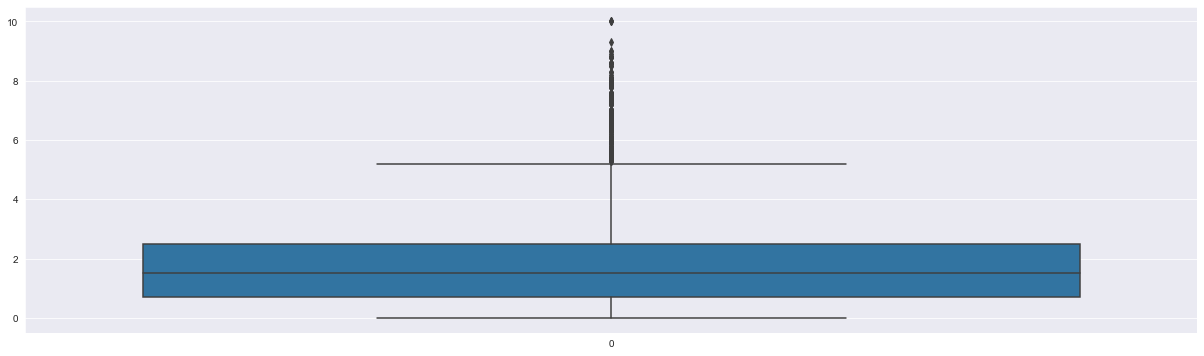

In [66]:
# Box Plot for MonthlyAverageSpend
f, ax = plt.subplots(figsize=(21, 6))
sns.boxplot(data=df_Bank.MonthlyAverageSpend)
plt.show()

In [67]:
col = ["Age", "CustomerSince", "HighestSpend", "HiddenScore", "MonthlyAverageSpend", "Mortgage"]
TotalOutliers = 0

for i in col:
        sample_outliers = []
        sample_outliers = detect_outliers_iqr(df_Bank[i])
        print("\n\nTotal Number of outliers in ", i, "is :", len(sample_outliers))

        TotalOutliers = TotalOutliers + len(sample_outliers)
        #print(df_biomechanics[i])
        median= df_Bank[i].median()

        if len(sample_outliers) > 0:
            print("\nOutliers : ", sample_outliers)
            print(
                "\nClass for respective Outliers:\n",
                df_Bank.LoanOnCard[df_Bank[i].isin(sample_outliers)]
            )
            df_Bank[i].loc[df_Bank[i].isin(sample_outliers)] = median
          
          
        else:
             print("\nThere are no Outliers")




Total Number of outliers in  Age is : 0

There are no Outliers


Total Number of outliers in  CustomerSince is : 0

There are no Outliers


Total Number of outliers in  HighestSpend is : 96

Outliers :  [188, 188, 188, 188, 188, 188, 188, 188, 188, 188, 189, 189, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 192, 192, 192, 192, 192, 192, 193, 193, 193, 193, 193, 193, 194, 194, 194, 194, 194, 194, 194, 194, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 198, 198, 198, 199, 199, 199, 200, 200, 200, 201, 201, 201, 201, 201, 202, 202, 203, 203, 204, 204, 204, 205, 205, 218, 224]

Class for respective Outliers:
 18      1.0
47      1.0
53      1.0
59      0.0
303     1.0
       ... 
4659    0.0
4670    0.0
4895    0.0
4981    0.0
4993    0.0
Name: LoanOnCard, Length: 96, dtype: float64


Total Number of outliers in  HiddenScore is : 0

There are no Outliers


Total Number of outliers in  

#### We have imputed all outliers with mean value

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3. Data Analysis and Visualization</span></div>

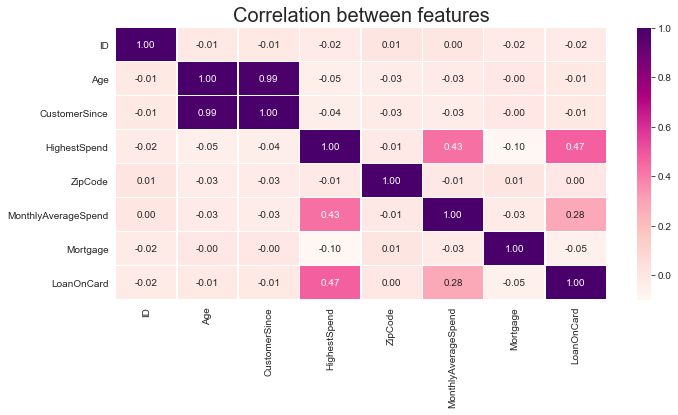

In [68]:
# correlation map
f, ax = plt.subplots(figsize=(11, 5))
sns.heatmap(df_Bank.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax=ax)
plt.title("Correlation between features", fontsize=20)
plt.show()

In [69]:
# Display positive and negative correlation between columns
df_Bank.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
ID,1.000000,-0.008473,-0.008326,-0.017353,0.013432,0.001667,-0.017931,-0.024801
Age,-0.008473,1.000000,0.994215,-0.046689,-0.029216,-0.028720,-0.002325,-0.007726
CustomerSince,-0.008326,0.994215,1.000000,-0.038185,-0.028626,-0.031385,-0.002555,-0.007413
HighestSpend,-0.017353,-0.046689,-0.038185,1.000000,-0.014000,0.431638,-0.097409,0.473979
ZipCode,0.013432,-0.029216,-0.028626,-0.014000,1.000000,-0.005134,0.009045,0.000107
MonthlyAverageSpend,0.001667,-0.028720,-0.031385,0.431638,-0.005134,1.000000,-0.027732,0.278860
Mortgage,-0.017931,-0.002325,-0.002555,-0.097409,0.009045,-0.027732,1.000000,-0.051526
LoanOnCard,-0.024801,-0.007726,-0.007413,0.473979,0.000107,0.278860,-0.051526,1.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

All the features are not correlated with label LoanOnCard, except HighestSpend
    
There is high positive relation between Age and CustomerSince
    
There is negative relation between LoanOnCard  and Mortgage              
    
There is high negative relation between Mortgage and HighestSpend
    
Mortage and highest spend has little correlation
   
</span>

In [70]:
# sorts all correlations with ascending sort.
df_Bank.corr().unstack().sort_values().drop_duplicates()

Mortgage             HighestSpend          -0.097409
LoanOnCard           Mortgage              -0.051526
HighestSpend         Age                   -0.046689
                     CustomerSince         -0.038185
MonthlyAverageSpend  CustomerSince         -0.031385
ZipCode              Age                   -0.029216
MonthlyAverageSpend  Age                   -0.028720
ZipCode              CustomerSince         -0.028626
MonthlyAverageSpend  Mortgage              -0.027732
LoanOnCard           ID                    -0.024801
Mortgage             ID                    -0.017931
HighestSpend         ID                    -0.017353
ZipCode              HighestSpend          -0.014000
Age                  ID                    -0.008473
ID                   CustomerSince         -0.008326
Age                  LoanOnCard            -0.007726
CustomerSince        LoanOnCard            -0.007413
ZipCode              MonthlyAverageSpend   -0.005134
Mortgage             CustomerSince         -0.

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3. Data Preparation and model building: 10</span></div>

### a. Split data into X and Y. [1 Mark]
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

#### Id and ZipCode column is not useful in model building so dropping that feature

In [71]:
df_Bank.drop(["ID", "ZipCode"], axis=1, inplace=True)

####  We can see Age,Customer since does not have effect on target variable. So dropping this column before building model

In [72]:
df_Bank.drop(["Age", "CustomerSince"], axis=1, inplace=True)

In [73]:
# Arrange data into independent variables and dependent variables
X = df_Bank.drop("LoanOnCard", axis=1)
y = df_Bank["LoanOnCard"]  # target

### b. Split data into train and test. Keep 25% data reserved for testing. [1 Mark]

In [74]:
# Split X and y into training and test set in 75:35 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

### c. Train a Supervised Learning Classification base model - Logistic Regression. [2 Mark]

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Logistic Regression Model</span></div>

In [75]:
# Fitting the model
logit = LogisticRegression()
logit.fit(X_train,y_train)


LogisticRegression()

### Model Score

In [76]:
print("Model Score for Training data:", np.round(logit.score(X_train, y_train), 2))
print("Model Score for Test data:", np.round(logit.score(X_test, y_test), 2))

Model Score for Training data: 0.95
Model Score for Test data: 0.95


### Prediction

In [77]:
# Predict for test set
pred_test = logit.predict(X_test)

In [78]:
# Predict for train set
pred_train = logit.predict(X_train)

In [79]:
# Predict for train set
print(
    "Accuracy Score on Training Data: ",
    np.round(accuracy_score(y_train, pred_train), 2),
)
print("\nAccuracy Score on Test Data: ", np.round(accuracy_score(y_test, pred_test), 2))

Accuracy Score on Training Data:  0.95

Accuracy Score on Test Data:  0.95


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">Training and Test accuracy is 95% which is good
    </span>

### Confusion matrix

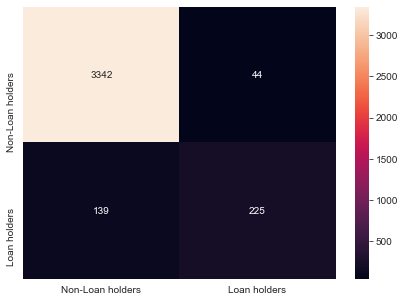

In [80]:
# Training Set
cm_train = confusion_matrix(y_train, pred_train, labels=[0, 1])
df_cm = pd.DataFrame(
    cm_train,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

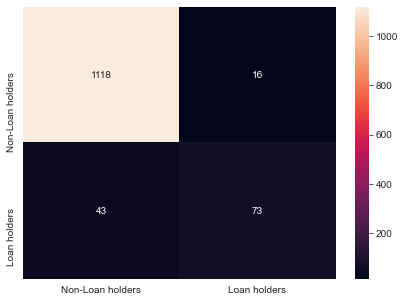

In [81]:
# Test Set
cm_Test = confusion_matrix(y_test, pred_test, labels=[0, 1])
df_cm = pd.DataFrame(
    cm_Test,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

In [82]:
print("Classification  Matrix:\n", classification_report(y_test, pred_test))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1134
         1.0       0.82      0.63      0.71       116

    accuracy                           0.95      1250
   macro avg       0.89      0.81      0.84      1250
weighted avg       0.95      0.95      0.95      1250



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
The accuracy comes out to be 95% which is good but below observations

The recall of the minority class (class 1 is 63%) is very less.

It proves that the model is more biased towards the majority class( Class 0 99%).
Logistic Regression is bias towards majority class Class 0  data

So, it proves that this is not the best model. 

Data is imbalanced .

Thus, there is a high probability of misclassification of the minority class Class 1 as compared to the majority class  Class 0.

Low recall 63% indicates a high number of false negatives.

We have to balanced the data using balancing technique Using SMOTE Algorithm and see their accuracy and recall results.
    </span>

## e. Balance the data using the right balancing technique. [2 Mark]

### SMOTE Algorithm 

In [83]:
print("Before OverSampling, counts of LoanOnCard: \n", y.value_counts())

smote_nc = SMOTENC(
    categorical_features=[1, 3, 5], random_state=42
)  # specifying categorical column numbers
x_s, y_s = smote_nc.fit_resample(X, y)

print("\nAfter OverSampling, counts of LoanOnCard : \n", y_s.value_counts())

print("\nAfter OverSampling, the shape of train_X: {}".format(x_s.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_s.shape))

Before OverSampling, counts of LoanOnCard: 
 0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

After OverSampling, counts of LoanOnCard : 
 0.0    4520
1.0    4520
Name: LoanOnCard, dtype: int64

After OverSampling, the shape of train_X: (9040, 9)
After OverSampling, the shape of train_y: (9040,) 



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
We can see the target is balanced after sampling

SMOTE Algorithm has oversampled the minority instances and made them equal to the majority class. 

Both categories have an equal amount of records.

More specifically, the minority class has been increased to the total number of the majority class. 

Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling). 
    
</span>

### f. Again train the same previous model on balanced data. [1 Mark]

In [84]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    x_s, y_s, test_size=0.30, random_state=10
)

In [85]:
# Fitting the model
logit = LogisticRegression()
logit.fit(X_train,y_train)


LogisticRegression()

### Model Score

In [86]:
print("Model Score for Training data:", np.round(logit.score(X_train, y_train), 2))
print("Model Score for Test data:", np.round(logit.score(X_test, y_test), 2))

Model Score for Training data: 0.89
Model Score for Test data: 0.88


### Prediction

In [87]:
# Predict for test set
pred_test = logit.predict(X_test)

In [88]:
# Predict for train set
pred_train = logit.predict(X_train)

In [89]:
# Predict for train set
print(
    "Accuracy Score on Training Data: ",
    np.round(accuracy_score(y_train, pred_train), 2),
)
print("\nAccuracy Score on Test Data: ", np.round(accuracy_score(y_test, pred_test), 2))

Accuracy Score on Training Data:  0.89

Accuracy Score on Test Data:  0.88


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">we can see there is decrease in  accuracy.</span>

## g. Print evaluation metrics and clearly share differences observed. [2 Mark]

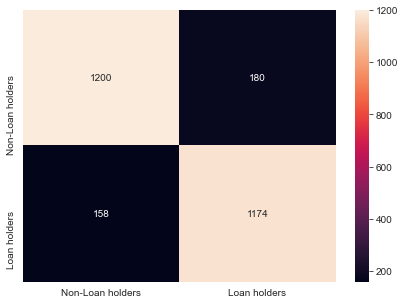

In [90]:
cm = confusion_matrix(y_test, pred_test, labels=[0, 1])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

In [91]:
print("classification  Matrix:\n", classification_report(y_test, pred_test))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1380
         1.0       0.87      0.88      0.87      1332

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
Now we can see recall value Class 1 is improved after sampling 0.88.

So whenever we have imbalance target we will use sampling method to balance the data.

If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.

we are doing smote only for training data
    
</span>

In [92]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [93]:
smote_nc = SMOTENC(categorical_features=[1, 3, 5], random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [94]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)

print("Accuracy on Training data:", logit.score(X_train, y_train))
print("Accuracy on Test data:", logit.score(X_test, y_test))

Accuracy on Training data: 0.8848571428571429
Accuracy on Test data: 0.8693333333333333


we can see there is decrease in test accuracy.

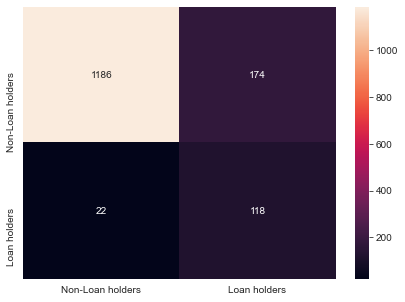

In [95]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

In [96]:
print("classification  Matrix:\n", classification_report(y_test, logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1360
         1.0       0.40      0.84      0.55       140

    accuracy                           0.87      1500
   macro avg       0.69      0.86      0.73      1500
weighted avg       0.93      0.87      0.89      1500



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

After doing sampling only on training data we can see difference in values

We are getting good recall value but the precision value is reduced

We will do sampling only on training data to check real performance of the model

</span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 4. Performance Improvement: 10</span></div>

## a. Train a base model each for SVM, KNN. [4 Marks]

### SVC

In [97]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)


In [98]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9517142857142857
0.9513333333333334


In [99]:
print("Confusion Matrix:\n", confusion_matrix(prediction, y_test))

Confusion Matrix:
 [[1348   61]
 [  12   79]]


In [100]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)

In [101]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9125714285714286
0.9086666666666666


In [190]:
print("Confusion Matrix:\n", confusion_matrix(prediction, y_test))

Confusion Matrix:
 [[1334  111]
 [  26   29]]


<IPython.core.display.Javascript object>

In [102]:
# Building a Support Vector Machine on train data(changing the kernel)
svc_model = SVC(kernel="poly")
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.93
0.9333333333333333


In [103]:
print("Confusion Matrix:\n", confusion_matrix(prediction, y_test))

Confusion Matrix:
 [[1360  100]
 [   0   40]]


In [104]:
svc_model = SVC(kernel="sigmoid")
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8988571428571429
0.902


In [194]:
print("Confusion Matrix:\n", confusion_matrix(prediction, y_test))

Confusion Matrix:
 [[1353  140]
 [   7    0]]


<IPython.core.display.Javascript object>

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

As per above SVM  model for different Kernels
For kernel='linear' we got maximum accuracy i.e 95%
    
</span>

### KNN

In [105]:
# Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9406666666666667
0.55


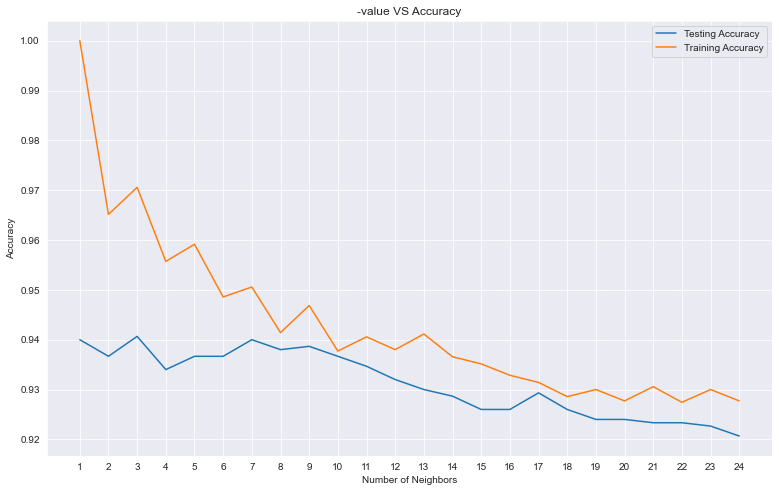

Best test accuracy is 0.9406666666666667 with K = 3.
The corresponding train accuracy is 0.9705714285714285.


In [106]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label="Testing Accuracy")
plt.plot(neig, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("-value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neig)
plt.savefig("graph.png")
plt.show()


print(
    "Best test accuracy is {} with K = {}.".format(
        np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))
    )
)
print(
    "The corresponding train accuracy is {}.".format(
        train_accuracy[test_accuracy.index(np.max(test_accuracy))]
    )
)

### b. Tune parameters/hyperparameters for each of the models wherever required and finalize a model. [3 Mark]

In [107]:
# Building a Support Vector Machine on train data
svc_model = SVC(C=0.1, kernel="linear", gamma=1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print("Before Tunning :\n", classification_report(y_test, prediction))

Before Tunning :
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1360
         1.0       0.87      0.56      0.68       140

    accuracy                           0.95      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



## Tunning SVM For Linear Kernel

In [199]:
# defining parameter range
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "gamma": ["scale", "auto"],
    "kernel": ["linear"],
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1360
         1.0       0.87      0.56      0.68       140

    accuracy                           0.95      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



<IPython.core.display.Javascript object>

There is no any difference in SVM Classificatoin score before and after tuning

### Tunning KNN

In [108]:
# Create new KNN object
knn_2 = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [4, 5, 6],
    "weights": ["distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [25, 23, 24],
    "metric": ["manhattan"],
}
# Use GridSearch
grid = GridSearchCV(knn_2, cv=5, param_grid=param_grid, verbose=1, n_jobs=1)
# Fit the model
best_model = grid.fit(X_train, y_train)
# Print The value of best Hyperparameters
print("Best leaf_size:", best_model.best_estimator_.get_params()["leaf_size"])
print("Best p:", best_model.best_estimator_.get_params()["p"])
print("Best n_neighbors:", best_model.best_estimator_.get_params()["n_neighbors"])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best leaf_size: 25
Best p: 2
Best n_neighbors: 4


In [111]:
ypredtest = best_model.predict(X_test)

In [109]:
#Parameter setting that gave the best results on the hold out data.
print('Best Params - KNN:',best_model.best_params_ ) 

#Mean cross-validated score of the best_estimator
print('\nBest Score - KNN:', best_model.best_score_ )


Best Params - KNN: {'algorithm': 'brute', 'leaf_size': 25, 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Best Score - KNN: 0.9434285714285714


In [112]:
print(classification_report(y_test, ypredtest))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1360
         1.0       0.76      0.57      0.65       140

    accuracy                           0.94      1500
   macro avg       0.86      0.78      0.81      1500
weighted avg       0.94      0.94      0.94      1500



### c. Print evaluation metrics for final model. [1 Mark]

<AxesSubplot:>

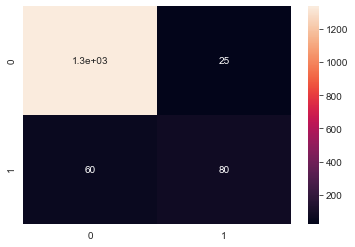

In [113]:
sns.heatmap(confusion_matrix(y_test, ypredtest), annot=True)

### d. Share improvement achieved from base model to final model. [2 Mark]


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
We are selecting final model as logistic regression as it performs well in training and testing test.

Logistic Regression is not affected by overfitting and it is also has good recall value.

Suggesting to collect data equally for both the classes ,balanced data

Few customers does't have credit card but those customer having loan on card. This data error can be avoided
    </span>